# Left-Right symmetric model Lagrangian

In this notbook we analyze the MLRSM following the work of [Bonilla2017](https://arxiv.org/abs/1611.07025)

In [1]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor, sin, cos, tan
from sympy.physics import msigma 
init_printing()

## Covariant derivative

In [2]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [3]:
WL[0]*msigma(1)

⎡  0     W_L__1⎤
⎢              ⎥
⎣W_L__1    0   ⎦

In [4]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

In [5]:
WsigmaL

⎡     W_L__3        W_L__1 - ⅈ⋅W_L__2⎤
⎢                                    ⎥
⎣W_L__1 + ⅈ⋅W_L__2       -W_L__3     ⎦

In [6]:
WsigmaR

⎡     W_R__3        W_R__1 - ⅈ⋅W_R__2⎤
⎢                                    ⎥
⎣W_R__1 + ⅈ⋅W_R__2       -W_R__3     ⎦

In [7]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [8]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

In [9]:
WsigmaL, WsigmaR

⎛⎡W_L__3  W_L__+ ⎤  ⎡W_R__3  W_R__+ ⎤⎞
⎜⎢               ⎥, ⎢               ⎥⎟
⎝⎣W_L__-  -W_L__3⎦  ⎣W_R__-  -W_R__3⎦⎠

## Scalars

### Triplets

In [10]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0', real=True)
deltaR0 = symbols(r'\delta_R^0', real=True)

In [11]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

In [12]:
DeltaL, DeltaR

⎛⎡√2⋅\delta_L__+                  ⎤  ⎡√2⋅\delta_R__+                  ⎤⎞
⎜⎢──────────────   \delta_L__{++} ⎥  ⎢──────────────   \delta_R__{++} ⎥⎟
⎜⎢      2                         ⎥  ⎢      2                         ⎥⎟
⎜⎢                                ⎥, ⎢                                ⎥⎟
⎜⎢                -√2⋅\delta_L__+ ⎥  ⎢                -√2⋅\delta_R__+ ⎥⎟
⎜⎢ \delta_L__0    ────────────────⎥  ⎢ \delta_R__0    ────────────────⎥⎟
⎝⎣                       2        ⎦  ⎣                       2        ⎦⎠

In [13]:
vL, vR = symbols('v_L, v_R', positive=True)
vevL = {deltaL0:vL, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

⎛⎡ 0   0⎤  ⎡ 0   0⎤⎞
⎜⎢      ⎥, ⎢      ⎥⎟
⎝⎣v_L  0⎦  ⎣v_R  0⎦⎠

In [14]:
Dmu_DeltaL = (-I*g/2*(WsigmaL*DeltaL - DeltaL*WsigmaL) - I*gBL*(B-L)/2*Bmu*DeltaL).subs(B-L, 2) # B -L = 2 for triplets L and R
Dmu_DeltaR = (-I*g/2*(WsigmaR*DeltaR - DeltaR*WsigmaR) - I*gBL*(B-L)/2*Bmu*DeltaR).subs(B-L, 2)

In [15]:
Dmu_DeltaL

⎡  √2⋅ⅈ⋅B_\mu⋅\delta_L__+⋅g_{B-L}   ⅈ⋅g⋅(W_L__+⋅\delta_L__0 - W_L__-⋅\delta_L_
⎢- ────────────────────────────── - ──────────────────────────────────────────
⎢                2                                         2                  
⎢                                                                             
⎢                               ⅈ⋅g⋅(-2⋅W_L__3⋅\delta_L__0 + √2⋅W_L__-⋅\delta_
⎢-ⅈ⋅B_\mu⋅\delta_L__0⋅g_{B-L} - ──────────────────────────────────────────────
⎣                                                        2                    

_{++})                                    ⅈ⋅g⋅(2⋅W_L__3⋅\delta_L__{++} - √2⋅W_
──────  -ⅈ⋅B_\mu⋅\delta_L__{++}⋅g_{B-L} - ────────────────────────────────────
                                                                    2         
                                                                              
L__+)     √2⋅ⅈ⋅B_\mu⋅\delta_L__+⋅g_{B-L}   ⅈ⋅g⋅(-W_L__+⋅\delta_L__0 + W_L__-⋅\
─────     ────────────────────────────── - ────────

In [16]:
Dmu_DeltaR

⎡  √2⋅ⅈ⋅B_\mu⋅\delta_R__+⋅g_{B-L}   ⅈ⋅g⋅(W_R__+⋅\delta_R__0 - W_R__-⋅\delta_R_
⎢- ────────────────────────────── - ──────────────────────────────────────────
⎢                2                                         2                  
⎢                                                                             
⎢                               ⅈ⋅g⋅(-2⋅W_R__3⋅\delta_R__0 + √2⋅W_R__-⋅\delta_
⎢-ⅈ⋅B_\mu⋅\delta_R__0⋅g_{B-L} - ──────────────────────────────────────────────
⎣                                                        2                    

_{++})                                    ⅈ⋅g⋅(2⋅W_R__3⋅\delta_R__{++} - √2⋅W_
──────  -ⅈ⋅B_\mu⋅\delta_R__{++}⋅g_{B-L} - ────────────────────────────────────
                                                                    2         
                                                                              
R__+)     √2⋅ⅈ⋅B_\mu⋅\delta_R__+⋅g_{B-L}   ⅈ⋅g⋅(-W_R__+⋅\delta_R__0 + W_R__-⋅\
─────     ────────────────────────────── - ────────

In [17]:
conjugate_fields = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRmm):deltaRpp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm
}

In [18]:
Dmu_DeltaL_dagger = conjugate(Dmu_DeltaL.T).subs(conjugate_fields)
Dmu_DeltaR_dagger = conjugate(Dmu_DeltaR.T).subs(conjugate_fields)

Dmu_DeltaL_dagger, Dmu_DeltaR_dagger


⎛⎡  √2⋅ⅈ⋅B_\mu⋅\delta_L__-⋅g_{B-L}   ⅈ⋅g⋅(-W_L__+⋅\delta_L__{--} + W_L__-⋅\del
⎜⎢  ────────────────────────────── + ─────────────────────────────────────────
⎜⎢                2                                          2                
⎜⎢                                                                            
⎜⎢                                 ⅈ⋅g⋅(2⋅W_L__3⋅\delta_L__{--} - √2⋅W_L__-⋅\d
⎜⎢ⅈ⋅B_\mu⋅\delta_L__{--}⋅g_{B-L} + ───────────────────────────────────────────
⎝⎣                                                           2                

ta_L__0)                                   ⅈ⋅g⋅(-2⋅W_L__3⋅\delta_L__0 + √2⋅W_L
────────     ⅈ⋅B_\mu⋅\delta_L__0⋅g_{B-L} + ───────────────────────────────────
                                                                    2         
                                                                              
elta_L__-)    √2⋅ⅈ⋅B_\mu⋅\delta_L__-⋅g_{B-L}   ⅈ⋅g⋅(W_L__+⋅\delta_L__{--} - W_
──────────  - ────────────────────────────── + ────

In [19]:
Dmu_DL_Dmu = (Dmu_DeltaL_dagger*Dmu_DeltaL).subs(vevL)
Dmu_DL_Dmu.shape

In [20]:
Dmu_DL_Dmu[0,0].simplify()

In [21]:
Dmu_DL_Dmu[1,1].simplify()

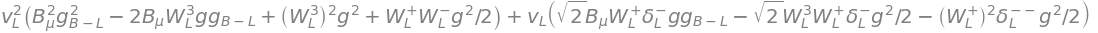

In [22]:
Tr_DmuL = trace(Dmu_DL_Dmu).expand().collect(vL)
Tr_DmuL

In [23]:
Dmu_DR_Dmu = (Dmu_DeltaR_dagger*Dmu_DeltaR).subs(vevR)

In [24]:
Dmu_DR_Dmu

⎡                            ⎛√2⋅ⅈ⋅B_\mu⋅\delta_R__-⋅g_{B-L}   ⅈ⋅g⋅(-W_R__+⋅\d
⎢             ⅈ⋅W_R__+⋅g⋅v_R⋅⎜────────────────────────────── + ───────────────
⎢                            ⎝              2                                 
⎢           - ────────────────────────────────────────────────────────────────
⎢                                                          2                  
⎢                                                                             
⎢                 ⎛                                 ⅈ⋅g⋅(2⋅W_R__3⋅\delta_R__{-
⎢  ⅈ⋅W_R__+⋅g⋅v_R⋅⎜ⅈ⋅B_\mu⋅\delta_R__{--}⋅g_{B-L} + ──────────────────────────
⎢                 ⎝                                                           
⎢- ───────────────────────────────────────────────────────────────────────────
⎣                                                     2                       

elta_R__{--} + W_R__-⋅v_R)⎞                                                   
──────────────────────────⎟                        

In [25]:
Dmu_DR_Dmu[0,0].simplify()

In [26]:
Dmu_DR_Dmu[1,1].simplify()

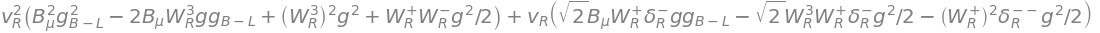

In [27]:
Tr_DmuR = trace(Dmu_DR_Dmu).expand().collect(vR)
Tr_DmuR

### Bidoublet

In [28]:
phi1p, phi1m = symbols(r'\phi_1^+, \phi_1^-')
phi2p, phi2m = symbols(r'\phi_2^+, \phi_2^-')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0', real=True)

In [29]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [phi2m, phi20]
    ]
)
Phi

⎡\phi⁰₁  \phi⁺₁⎤
⎢              ⎥
⎣\phi⁻₂  \phi⁰₂⎦

In [30]:
v, beta = symbols(r"v, \beta", positive=True)
vevPhi = {phi10:v*cos(beta), phi20:v*sin(beta), phi1p:0, phi2m:0, phi2p:0, phi1m:0}
Phi.subs(vevPhi)

⎡v⋅cos(\beta)       0      ⎤
⎢                          ⎥
⎣     0        v⋅sin(\beta)⎦

In [31]:
Dmu_Phi = -I*g/2*(WsigmaL*Phi - Phi*WsigmaR) # B - L = 0 for the bidoublet
Dmu_Phi

⎡-ⅈ⋅g⋅(W_L__3⋅\phi⁰₁ - W_R__3⋅\phi⁰₁ + W_L__+⋅\phi⁻₂ - W_R__-⋅\phi⁺₁)    -ⅈ⋅g⋅
⎢─────────────────────────────────────────────────────────────────────   ─────
⎢                                  2                                          
⎢                                                                             
⎢-ⅈ⋅g⋅(-W_L__3⋅\phi⁻₂ - W_R__3⋅\phi⁻₂ + W_L__-⋅\phi⁰₁ - W_R__-⋅\phi⁰₂)   -ⅈ⋅g⋅
⎢──────────────────────────────────────────────────────────────────────  ─────
⎣                                  2                                          

(W_L__3⋅\phi⁺₁ + W_R__3⋅\phi⁺₁ + W_L__+⋅\phi⁰₂ - W_R__+⋅\phi⁰₁)  ⎤
──────────────────────────────────────────────────────────────── ⎥
                             2                                   ⎥
                                                                 ⎥
(-W_L__3⋅\phi⁰₂ + W_R__3⋅\phi⁰₂ + W_L__-⋅\phi⁺₁ - W_R__+⋅\phi⁻₂) ⎥
─────────────────────────────────────────────────────────────────⎥
                             2              

In [32]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

In [33]:
Dmu_Phi_dagger = conjugate(Dmu_Phi.T).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

⎡ⅈ⋅g⋅(W_L__3⋅\phi⁰₁ - W_R__3⋅\phi⁰₁ + W_L__-⋅\phi⁺₂ - W_R__+⋅\phi⁻₁)  ⅈ⋅g⋅(-W_
⎢───────────────────────────────────────────────────────────────────  ────────
⎢                                 2                                           
⎢                                                                             
⎢ⅈ⋅g⋅(W_L__3⋅\phi⁻₁ + W_R__3⋅\phi⁻₁ + W_L__-⋅\phi⁰₂ - W_R__-⋅\phi⁰₁)  ⅈ⋅g⋅(-W_
⎢───────────────────────────────────────────────────────────────────  ────────
⎣                                 2                                           

L__3⋅\phi⁺₂ - W_R__3⋅\phi⁺₂ + W_L__+⋅\phi⁰₁ - W_R__+⋅\phi⁰₂)⎤
────────────────────────────────────────────────────────────⎥
                         2                                  ⎥
                                                            ⎥
L__3⋅\phi⁰₂ + W_R__3⋅\phi⁰₂ + W_L__+⋅\phi⁻₁ - W_R__-⋅\phi⁺₂)⎥
────────────────────────────────────────────────────────────⎥
                         2                                  ⎦

In [34]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(vevPhi).simplify()
Dmu_Phi_Dmu

⎡ 2  2 ⎛                 2    2                                               
⎢g ⋅v ⋅⎝(W_L__3 - W_R__3) ⋅cos (\beta) + (W_L__+⋅cos(\beta) - W_R__+⋅sin(\beta
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                           4                 
⎢                                                                             
⎢                                              2  2                           
⎢                                      W_R__-⋅g ⋅v ⋅(-W_L__3 + W_R__3)⋅cos(2⋅\
⎢                                      ───────────────────────────────────────
⎣                                                           4                 

                                          ⎞                                   
))⋅(W_L__-⋅cos(\beta) - W_R__-⋅sin(\beta))⎠                                   
───────────────────────────────────────────                                   
                                                   

In [35]:
from sympy import simplify

In [36]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu).expand().collect([cos(beta), sin(beta)]).simplify()
Tr_DmuPhi 

### Kinetic Higgs lagrangian

In [37]:
LHiggs = Tr_DmuL + Tr_DmuR + Tr_DmuPhi 

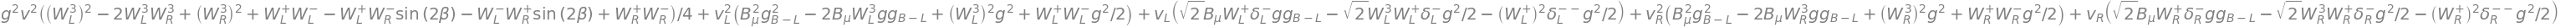

In [38]:
LHiggs

#### $W^\pm$ mass matrix

In [39]:
MW11 = LHiggs.diff(WLm, WLp)/2
MW12 = LHiggs.diff(WLm, WRp)/2
MW21 = LHiggs.diff(WRm, WLp)/2
MW22 = LHiggs.diff(WRm, WRp)/2

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
)
MW

⎡   2 ⎛ 2        2⎞      2  2              ⎤
⎢  g ⋅⎝v  + 2⋅v_L ⎠    -g ⋅v ⋅sin(2⋅\beta) ⎥
⎢  ────────────────    ────────────────────⎥
⎢         8                     8          ⎥
⎢                                          ⎥
⎢  2  2                   2 ⎛ 2        2⎞  ⎥
⎢-g ⋅v ⋅sin(2⋅\beta)     g ⋅⎝v  + 2⋅v_R ⎠  ⎥
⎢────────────────────    ────────────────  ⎥
⎣         8                     8          ⎦

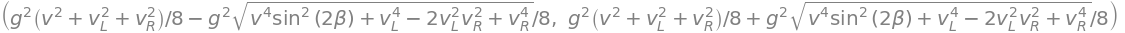

In [40]:
MW1square, MW2square = list(MW.eigenvals().keys())
MW1square, MW2square

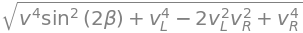

In [41]:
sqrt_vevs = MW1square.args[0].args[2]
sqrt_vevs

In [42]:
sqrt_vevs_sim = (sqrt_vevs.args[0] - v**4*sin(2*beta)**2).factor() + v**4*sin(2*beta)**2
sqrt_vevs_sim

Following the hierarchy $v_R >> v_1 = v \cos\beta$ and $v_2 = v \sin\beta >> v_L$
$$ \sqrt{v^4 \sin^2{(2\beta)} + \left(v_{L} - v_{R}\right)^{2} \left(v_{L} + v_{R}\right)^{2}} \approx 
\sqrt{v^4 \sin^2{(2\beta)} + v_{R}^4} = \frac{v_R^2}{2}\sqrt{1+x}
$$
where $x = \frac{v^4 \sin^2{(2\beta)}}{v_R^4} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

In [43]:
x = (v**4*sin(2*beta)**2)/vR**2
sqrt_vevs_approx = ((vR**2)*(1 + x/2)).simplify()
sqrt_vevs_approx

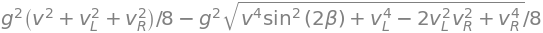

In [44]:
MW1square

In [45]:
MW1square_approx = MW1square.subs(sqrt_vevs, sqrt_vevs_approx).subs(vL,0).subs(beta,0).expand()
MW1square_approx 

In [46]:
MW2square.subs(sqrt_vevs, sqrt_vevs_approx).subs(vL,0).subs(beta,0).expand()

In [47]:
MW2square_approx = g**2/4*vR**2

In this approximation 
$$M_{W_1}^2 \approx \frac{g^2v^2}{8}$$
$$M_{W_2}^2 \approx \frac{g^2}{4}v_R^2$$

In [48]:
MW_approx = Matrix(
    [
        [MW1square_approx, 0 ],
        [0, MW2square_approx]
    ]
)
MW_approx

⎡ 2  2         ⎤
⎢g ⋅v          ⎥
⎢─────     0   ⎥
⎢  8           ⎥
⎢              ⎥
⎢        2    2⎥
⎢       g ⋅v_R ⎥
⎢  0    ───────⎥
⎣          4   ⎦

In this approximation the gauge eigenstates are also approximate mass eigenstates, ans since the expressions for current, etc., are simpler in the $W_{L,R}\pm$ basis ,it is often used in phenomenological studies. The mixing is given by 

$$\binom{W_L^{ \pm}}{W_R^{ \pm}}=\left(\begin{array}{cc}
\cos \zeta & -\sin \zeta e^{i \lambda} \\
\sin \zeta e^{-i \lambda} & \cos \zeta
\end{array}\right)\binom{W_1^{ \pm}}{W_2^{ \pm}} .$$

In [49]:
from sympy import cos, sin, tan

In [50]:
zeta = symbols(r'\zeta', positive=True)
cz = cos(zeta)
sz = sin(zeta)
sz, cz

In [51]:
RW = Matrix(
    [
        [cz, -sz],
        [sz, cz]
    ]
)
RW

⎡cos(\zeta)  -sin(\zeta)⎤
⎢                       ⎥
⎣sin(\zeta)  cos(\zeta) ⎦

In [52]:
W1p, W2p = symbols('W_1^+, W_2^+', real=True)

In [53]:
W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
W12p_doublet

⎡W⁺₁⎤
⎢   ⎥
⎣W⁺₂⎦

In [54]:
mixingW12 = RW*W12p_doublet
mixingW12

⎡W⁺₁⋅cos(\zeta) - W⁺₂⋅sin(\zeta)⎤
⎢                               ⎥
⎣W⁺₁⋅sin(\zeta) + W⁺₂⋅cos(\zeta)⎦

In [55]:
WLp

In [56]:
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

In the limit $\zeta \to 0$, we have

In [57]:
WLp_mix.subs(zeta, 0)

In [58]:
WRp_mix.subs(zeta, 0)

The weak eigenstates are equal to the mass eigenstates

#### Neutral boson mass matrix

In [59]:
from sympy.tensor.array import derive_by_array

In [60]:
WLWRB = [W3L, W3R, Bmu]
M0_square = derive_by_array(derive_by_array(LHiggs, WLWRB), WLWRB).simplify().tomatrix()/2
M0_square

⎡ 2 ⎛ 2        2⎞        2  2                              ⎤
⎢g ⋅⎝v  + 4⋅v_L ⎠      -g ⋅v                          2    ⎥
⎢────────────────      ───────          -g⋅g_{B-L}⋅v_L     ⎥
⎢       4                 4                                ⎥
⎢                                                          ⎥
⎢      2  2         2 ⎛ 2        2⎞                        ⎥
⎢    -g ⋅v         g ⋅⎝v  + 4⋅v_R ⎠                   2    ⎥
⎢    ───────       ────────────────     -g⋅g_{B-L}⋅v_R     ⎥
⎢       4                 4                                ⎥
⎢                                                          ⎥
⎢              2                 2          2 ⎛   2      2⎞⎥
⎣-g⋅g_{B-L}⋅v_L    -g⋅g_{B-L}⋅v_R    g_{B-L} ⋅⎝v_L  + v_R ⎠⎦

In [61]:
M0_square.subs(vL, 0)

⎡  2  2         2  2                       ⎤
⎢ g ⋅v        -g ⋅v                        ⎥
⎢ ─────       ───────              0       ⎥
⎢   4            4                         ⎥
⎢                                          ⎥
⎢  2  2    2 ⎛ 2        2⎞                 ⎥
⎢-g ⋅v    g ⋅⎝v  + 4⋅v_R ⎠                2⎥
⎢───────  ────────────────  -g⋅g_{B-L}⋅v_R ⎥
⎢   4            4                         ⎥
⎢                                          ⎥
⎢                       2           2    2 ⎥
⎣   0     -g⋅g_{B-L}⋅v_R     g_{B-L} ⋅v_R  ⎦

In [62]:
MZ1_square, MZ2_square, MA_square = list((M0_square.subs(vL,0)).eigenvals().keys()) # list(MW.eigenvals().keys())

In [63]:
MA_square

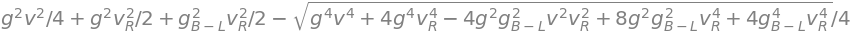

In [64]:
MZ1_square.simplify()

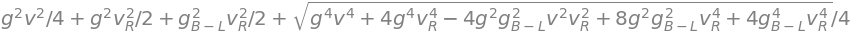

In [65]:
MZ2_square

If $v_R$ is large

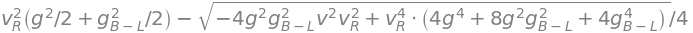

In [66]:
MZ1_square_approx = MZ1_square.subs(g**2*v**2/4,0).subs(g**4*v**4, 0).collect(vR)
MZ1_square_approx 

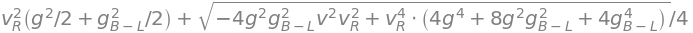

In [67]:
MZ2_square_approx = MZ2_square.subs(g**2*v**2/4,0).subs(g**4*v**4, 0).collect(vR)
MZ2_square_approx 

In [68]:
MZ_root = ((MZ2_square_approx - MZ1_square_approx)*2).args[0].collect(vR, factor)
MZ_root

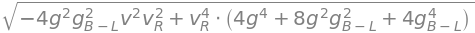

In [69]:
sqrt_Z = (MZ2_square_approx - MZ1_square_approx)*2
sqrt_Z

Following the limit $v_R$ large 
$$ \sqrt{- 4 g^{2} g_{B-L}^{2} v^{2} v_{R}^{2} + 4 v_{R}^{4} \left(g^{2} + g_{B-L}^{2}\right)^{2}} = 
2v_R^2(g^2 + g_{B-L}^2) \sqrt{1 - \frac{g^{2} g_{B-L}^{2} v^2 }{v_R^2 \left(g^{2} + g_{B-L}^{2}\right)^{2}}}
$$
if we consider $x = - \frac{g^{2} g_{B-L}^{2} v^2}{v_R^2 \left(g^{2} + g_{B-L}^{2}\right)^{2}} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

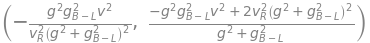

In [70]:
x = - (g**2*gBL**2*v**2)/(vR**2*(g**2 + gBL**2)**2)
sqrt_Z_approx = ((2*vR**2*(g**2 + gBL**2))*(1 + x/2)).simplify()
x, sqrt_Z_approx

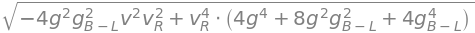

In [71]:
sqrt_Z

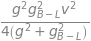

In [72]:
MZ1_square_approx2 = MZ1_square_approx.subs(sqrt_Z, sqrt_Z_approx).simplify()
MZ1_square_approx2

In [73]:
MZ2_square_approx = MZ2_square_approx.subs(sqrt_Z, sqrt_Z_approx).expand().collect(vR, factor).subs(v,0)
MZ2_square_approx

Following the definition

$$
\begin{aligned}
& s_W \equiv \sin \theta_W=\frac{g^{\prime}}{\sqrt{g^2+2 g^{\prime 2}}}, \\
& c_W \equiv \cos \theta_W=\sqrt{\frac{g^2+g^{\prime 2}}{g^2+2 g^{\prime 2}}} \\
& s_Y \equiv \sin \theta_Y=\frac{g^{\prime}}{\sqrt{g^2+g^{\prime 2}}} \\
& c_Y \equiv \cos \theta_Y=\frac{g}{\sqrt{g^2+g^{\prime 2}}}
\end{aligned}
$$

Then the mixing among, the weak eigenstates $W_L^3$ $W_R^3$ and $B$ with the physical eigen states is given by
$$
\left(\begin{array}{c}
A \\
Z_1 \\
Z_2
\end{array}\right)=\left(\begin{array}{ccc}
s_W & c_W s_Y & c_W c_Y \\
-c_W & s_W s_Y & s_W c_Y \\
0 & -c_Y & s_Y
\end{array}\right)\left(\begin{array}{c}
W_L^3 \\
W_R^3 \\
B
\end{array}\right)
$$

In [74]:
thW, thY = symbols(r'\theta_W, \theta_Y', positive=True)
cW, sW = cos(thW), sin(thW)
cY, sY = cos(thY), sin(thY)

In [75]:
RZ = Matrix(
    [
        [sW, cW*sY, cW*cY],
        [-cW, sW*sY, sW*cY],
        [0, -cY, sY]
    ]
)
RZ

⎡sin(\theta_W)   sin(\theta_Y)⋅cos(\theta_W)  cos(\theta_W)⋅cos(\theta_Y)⎤
⎢                                                                        ⎥
⎢-cos(\theta_W)  sin(\theta_W)⋅sin(\theta_Y)  sin(\theta_W)⋅cos(\theta_Y)⎥
⎢                                                                        ⎥
⎣      0               -cos(\theta_Y)                sin(\theta_Y)       ⎦

In [76]:
A, Z1, Z2 = symbols('A, Z_1, Z_2', real=True)
AZ12_triplet =  Matrix(
    [
        [A],
        [Z1],
        [Z2]
    ]
)
AZ12_triplet

⎡A ⎤
⎢  ⎥
⎢Z₁⎥
⎢  ⎥
⎣Z₂⎦

In [77]:
mixingAZ12 = RZ.T*AZ12_triplet
mixingAZ12

⎡                       A⋅sin(\theta_W) - Z₁⋅cos(\theta_W)                    
⎢                                                                             
⎢A⋅sin(\theta_Y)⋅cos(\theta_W) + Z₁⋅sin(\theta_W)⋅sin(\theta_Y) - Z₂⋅cos(\thet
⎢                                                                             
⎣A⋅cos(\theta_W)⋅cos(\theta_Y) + Z₁⋅sin(\theta_W)⋅cos(\theta_Y) + Z₂⋅sin(\thet

    ⎤
    ⎥
a_Y)⎥
    ⎥
a_Y)⎦

In [78]:
W3L_mix = mixingAZ12[0]
W3R_mix = mixingAZ12[1]
B_mix = mixingAZ12[2]

In [79]:
W3L_mix, W3L_mix.subs(thY,0)

In [80]:
W3R_mix, W3R_mix.subs(thY,0)

In [81]:
B_mix, B_mix.subs(thY,0)

## Scalar potential and Higgs mass spectrum

In [82]:
from sympy.physics.quantum import Dagger
from sympy import solve

In [83]:
PhiDagger = Dagger(Phi).subs(conjugate_scalarsPhi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = msigma(2)*Phi*msigma(2)
#Phitilde
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde).subs(conjugate_scalarsPhi)
#PhitildeDagger
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)

⎡         2                                                  ⎤
⎢   \phi⁰₁  + \phi⁺₂⋅\phi⁻₂     \phi⁺₁⋅\phi⁰₁ + \phi⁺₂⋅\phi⁰₂⎥
⎢                                                            ⎥
⎢                                                        2   ⎥
⎣\phi⁻₁⋅\phi⁰₁ + \phi⁻₂⋅\phi⁰₂     \phi⁺₁⋅\phi⁻₁ + \phi⁰₂    ⎦

⎡-\phi⁻₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂  \phi⁺₂⋅\phi⁰₂ - \phi⁻₂⋅\phi⁰₂ ⎤
⎢                                                              ⎥
⎣-\phi⁺₁⋅\phi⁰₁ + \phi⁻₁⋅\phi⁰₁  -\phi⁺₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁰₂⎦

⎡-\phi⁻₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂  \phi⁺₁⋅\phi⁰₂ - \phi⁻₁⋅\phi⁰₂ ⎤
⎢                                                              ⎥
⎣-\phi⁰₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁻₂  -\phi⁺₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁰₂⎦

⎡                         2                                  ⎤
⎢   \phi⁺₁⋅\phi⁻₁ + \phi⁰₁      \phi⁺₁⋅\phi⁰₂ + \phi⁰₁⋅\phi⁺₂⎥
⎢                                                            ⎥
⎢                                                        2   ⎥
⎣\phi⁻₁⋅\phi⁰₂ + \phi⁰₁⋅\phi⁻₂     \phi⁺₂⋅\phi⁻₂ + \phi⁰₂    ⎦

In [248]:
conjugate_scalars_deltaL = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    #conjugate(deltaLpp):deltaLmm,
    #conjugate(deltaLmm):deltaLpp
}

conjugate_scalars_deltaR = {
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRm):deltaRp,
    #conjugate(deltaRpp):deltaRmm,
    #conjugate(deltaRmm):deltaRpp
}

In [249]:
DeltaL

⎡√2⋅\delta_L__+                  ⎤
⎢──────────────   \delta_L__{++} ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_L__+ ⎥
⎢ \delta_L__0    ────────────────⎥
⎣                       2        ⎦

In [250]:
DeltaLDagger = Dagger(DeltaL).subs(conjugate_scalars_deltaL)
DeltaLDagger

⎡√2⋅\delta_L__-                  ⎤
⎢──────────────    \delta_L__0   ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢______________  -√2⋅\delta_L__- ⎥
⎢\delta_L__{++}  ────────────────⎥
⎣                       2        ⎦

In [251]:
DeltaRDagger = Dagger(DeltaR).subs(conjugate_scalars_deltaR)
DeltaRDagger

⎡√2⋅\delta_R__-                  ⎤
⎢──────────────    \delta_R__0   ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢______________  -√2⋅\delta_R__- ⎥
⎢\delta_R__{++}  ────────────────⎥
⎣                       2        ⎦

In [252]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

⎡  \delta_L__+⋅\delta_L__-                  ______________     √2⋅\delta_L__+⋅
⎢  ─────────────────────── + \delta_L__{++}⋅\delta_L__{++}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢                 ______________                                              
⎢  √2⋅\delta_L__+⋅\delta_L__{++}   √2⋅\delta_L__-⋅\delta_L__0            \delt
⎢- ───────────────────────────── + ──────────────────────────            ─────
⎣                2                             2                              

\delta_L__0   √2⋅\delta_L__-⋅\delta_L__{++}⎤
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
                                           ⎥
a_L__+⋅\delta_L__-              2          ⎥
────────────────── + \delta_L__0           ⎥
      2                                    ⎦

⎡           2                                                                 
⎢\delta_L__+                                                                  
⎢──────────── + \delta_L__0⋅\delta_L__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_L__+                       
⎢                    0                      ──────────── + \delta_L__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
L__{++}⎥
       ⎦

⎡          \delta_L__+⋅\delta_L__-              2              √2⋅\delta_L__+⋅
⎢          ─────────────────────── + \delta_L__0             - ───────────────
⎢                     2                                                    2  
⎢                                                                             
⎢               ______________                                                
⎢√2⋅\delta_L__+⋅\delta_L__{++}   √2⋅\delta_L__-⋅\delta_L__0    \delta_L__+⋅\de
⎢───────────────────────────── - ──────────────────────────    ───────────────
⎣              2                             2                            2   

\delta_L__0   √2⋅\delta_L__-⋅\delta_L__{++}⎤
─────────── + ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
                                           ⎥
lta_L__-                  ______________   ⎥
──────── + \delta_L__{++}⋅\delta_L__{++}   ⎥
                                           ⎦

⎡           2                                                                 
⎢\delta_L__-                ______________                                    
⎢──────────── + \delta_L__0⋅\delta_L__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_L__-                _______
⎢                    0                      ──────────── + \delta_L__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
_______⎥
L__{++}⎥
       ⎦

In [253]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

⎡  \delta_R__+⋅\delta_R__-                  ______________     √2⋅\delta_R__+⋅
⎢  ─────────────────────── + \delta_R__{++}⋅\delta_R__{++}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢                 ______________                                              
⎢  √2⋅\delta_R__+⋅\delta_R__{++}   √2⋅\delta_R__-⋅\delta_R__0            \delt
⎢- ───────────────────────────── + ──────────────────────────            ─────
⎣                2                             2                              

\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎤
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
                                           ⎥
a_R__+⋅\delta_R__-              2          ⎥
────────────────── + \delta_R__0           ⎥
      2                                    ⎦

⎡           2                                                                 
⎢\delta_R__+                                                                  
⎢──────────── + \delta_R__0⋅\delta_R__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_R__+                       
⎢                    0                      ──────────── + \delta_R__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
R__{++}⎥
       ⎦

⎡          \delta_R__+⋅\delta_R__-              2              √2⋅\delta_R__+⋅
⎢          ─────────────────────── + \delta_R__0             - ───────────────
⎢                     2                                                    2  
⎢                                                                             
⎢               ______________                                                
⎢√2⋅\delta_R__+⋅\delta_R__{++}   √2⋅\delta_R__-⋅\delta_R__0    \delta_R__+⋅\de
⎢───────────────────────────── - ──────────────────────────    ───────────────
⎣              2                             2                            2   

\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎤
─────────── + ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
                                           ⎥
lta_R__-                  ______________   ⎥
──────── + \delta_R__{++}⋅\delta_R__{++}   ⎥
                                           ⎦

⎡           2                                                                 
⎢\delta_R__-                ______________                                    
⎢──────────── + \delta_R__0⋅\delta_R__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_R__-                _______
⎢                    0                      ──────────── + \delta_R__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
_______⎥
R__{++}⎥
       ⎦

### Higgs potential

In [254]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [255]:
VLRPhi = (
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + lamb1*(trace(PhiDaggerPhi))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) 
        + trace(PhitildeDaggerPhi)*trace(DeltaLDaggerDeltaL) + trace(PhitildePhiDagger)*trace(DeltaRDaggerDeltaR)
    )
    + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    + beta3*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

In [256]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

In [257]:
#scalar_vevs = [cos(beta), sin(beta), vL, vR]
#for vev in scalar_vevs:
#    display(VLRPhi_vev.diff(vev))

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

In [258]:
sigma1, psi1 = symbols(r'\sigma_1, \psi_1', real=True)
sigma2, psi2 = symbols(r'\sigma_2, \psi_2', real=True)
sigmaR, psiR = symbols(r'\sigma_R, \psi_R', real=True)
sigmaL, psiL = symbols(r'\sigma_L, \psi_L', real=True)
v1, v2 = symbols(r'v_1, v_2', real=True)
complex_scalar_fields = {
    phi10: (v1+ sigma1 + I*psi1)/sqrt2,
    phi20: (v2 + sigma2 + I*psi2)/sqrt2,
    deltaR0: (vR + sigmaR + I*psiR)/sqrt2,
    deltaL0: (vL + sigmaL + I*psiL)/sqrt2
}

In [259]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

In [260]:
vevPhi[sigma1] = 0
vevPhi[psi1] = 0
vevPhi[sigma2] = 0
vevPhi[psi2] = 0

In [261]:
vevL[sigmaL] = 0
vevL[psiL] = 0
vevR[sigmaR] = 0
vevR[psiR] = 0

In [262]:
tadpol1 = VLRPhi_ri.diff(v1).subs(vevPhi).subs(vevL).subs(vevR).simplify()
display(tadpol1)
tadpol2 = VLRPhi_ri.diff(v2).subs(vevPhi).subs(vevL).subs(vevR).simplify()
tadpol2

In [263]:
tadpol3 = VLRPhi_ri.diff(vR).subs(vevR).subs(vevPhi).subs(vevL)
display(tadpol3)
tadpol4 = VLRPhi_ri.diff(vL).subs(vevL).subs(vevPhi).subs(vevR)
tadpol4

In [264]:
tadpole12_sol = solve([tadpol1, tadpol2], [mu12, mu22], dict=True)[0]

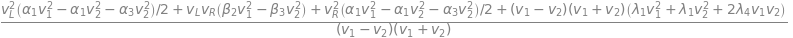

In [265]:
tadpole12_sol[mu12].collect([v, vL, vR], factor).simplify()#.factor()

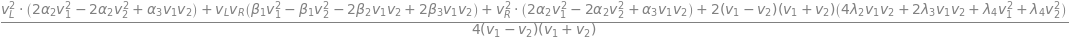

In [266]:
tadpole12_sol[mu22].simplify().collect([v, vL, vR], factor).simplify()

In [267]:
tadpole34_sol = solve([tadpol3, tadpol4], [mu32, beta2], dict=True)[0]

In [268]:
tadpole34_sol[mu32].collect(alpha1, factor).collect(rho1)

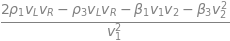

In [269]:
tadpole34_sol[beta2].simplify()

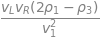

In [270]:
tadpole34_sol[beta2].simplify().subs(beta3, beta1).subs(beta1,0).simplify()

# Scalar masses

In [271]:
#betas_zero = {beta1:0, beta2:0, beta3:0}

In [272]:
#for mu in tadpole12_sol:
#    tadpole12_sol[mu] = tadpole12_sol[mu].subs(betas_zero).simplify()

#for mu in tadpole34_sol:
#    tadpole34_sol[mu] = tadpole34_sol[mu].subs(betas_zero).simplify()

In [273]:
#tadpole12_sol

In [274]:
#tadpole34_sol

In [275]:
#tadpole34_sol[beta2]

In [276]:
#vL_sol = {vL:0}
#vL_sol 

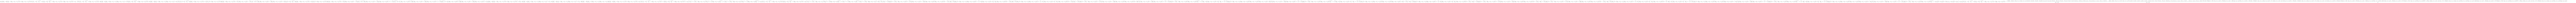

In [277]:
VLRPhi_ri_tadpole = VLRPhi_ri.subs(tadpole12_sol).subs(tadpole34_sol)
VLRPhi_ri_tadpole

In [278]:
#Phi.subs(complex_scalar_fields)

In [279]:
#DeltaL.subs(complex_scalar_fields)

In [280]:
v12_beta = {
    v1:v*cos(beta),
    v2:v*sin(beta)
}

In [281]:
phir_fields = [sigma1, sigma2, sigmaR, sigmaL]
MR_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phir_fields), phir_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(v12_beta).subs(sin(beta), tan(beta)*cos(beta)).simplify()
MR_square

⎡               2    2    2                   2    2    2                    4
⎢      \alpha₃⋅v ⋅v_L ⋅sin (\beta)   \alpha₃⋅v ⋅v_R ⋅sin (\beta)   \lambda₁⋅v 
⎢    - ─────────────────────────── - ─────────────────────────── + ───────────
⎢                   4                             4                           
⎢    ─────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢         2    2                         2    2                               
⎢\alpha₃⋅v ⋅v_L ⋅sin(2⋅\beta)   \alpha₃⋅v ⋅v_R ⋅sin(2⋅\beta)             4    
⎢──────────────────────────── + ──────────────────────────── + \lambda₁⋅v ⋅sin
⎢             8                              8                                
⎢───────────────────────────────────────────────────

In [282]:
MR_square[0,0].subs(vL,0).expand().collect(vR, factor, evaluate=False)[vR**2].trigsimp()

In [283]:
phii_fields = [psi1, psi2, psiR, psiL]
MI_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phii_fields), phii_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(v12_beta).subs(sin(beta), tan(beta)*cos(beta)).simplify()
MI_square

⎡               2    2    2                   2    2    2                    4
⎢      \alpha₃⋅v ⋅v_L ⋅sin (\beta)   \alpha₃⋅v ⋅v_R ⋅sin (\beta)   \lambda₁⋅v 
⎢      ─────────────────────────── + ─────────────────────────── - ───────────
⎢                   4                             4                           
⎢      ───────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢           2    2                         2    2                             
⎢  \alpha₃⋅v ⋅v_L ⋅sin(2⋅\beta)   \alpha₃⋅v ⋅v_R ⋅sin(2⋅\beta)             4  
⎢- ──────────────────────────── - ──────────────────────────── - \lambda₁⋅v ⋅s
⎢               8                              8                              
⎢───────────────────────────────────────────────────

In [284]:
MR_square + MI_square

⎡                     2    2    2                   2    2    2               
⎢            \alpha₃⋅v ⋅v_L ⋅sin (\beta)   \alpha₃⋅v ⋅v_R ⋅sin (\beta)   \lamb
⎢          - ─────────────────────────── - ─────────────────────────── + ─────
⎢                         4                             4                     
⎢          ───────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢           2    2                         2    2                             
⎢  \alpha₃⋅v ⋅v_L ⋅sin(2⋅\beta)   \alpha₃⋅v ⋅v_R ⋅sin(2⋅\beta)             4  
⎢- ──────────────────────────── - ──────────────────────────── - \lambda₁⋅v ⋅s
⎢               8                              8                              
⎢───────────────────────────────────────────────────

In [285]:
MI_square[0,0].subs(vL,0).expand().collect(vR, factor, evaluate=False)[vR**2].trigsimp()

In [286]:
from sympy import simplify

In [287]:
vevL

In [288]:
vevL[deltaLmm] = 0
vevL[deltaRmm] = 0
vevL[deltaLm] = 0
vevL[deltaRm] = 0

In [289]:
sqrt(v1**2 + v2**2).subs(v12_beta).simplify()

In [290]:
from sympy import Eq

In [291]:
phim = (v1*phi1p + v2*phi2p)/v
phip = (-v2*phi1p + v1*phi2p)/v
phip_sp, phim_sp = symbols(r'{{\phi^+}}, {{\phi^-}}')
eqp = Eq(phip_sp, phip)
eqm = Eq(phim_sp, phim)
sol_phi12p = solve((eqp.subs(v12_beta), eqm.subs(v12_beta)), (phi1p, phi2p))
for sol in sol_phi12p:
    sol_phi12p[sol] = sol_phi12p[sol].simplify()

In [292]:
sol_phi12p

In [293]:
phip_fields = [phim_sp, phip_sp, deltaRm, deltaLm]
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole.subs(sol_phi12p), phip_fields), phip_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(phip_sp,0).subs(phim_sp, 0).subs(v12_beta).subs(sin(beta), tan(beta)*cos(beta)).simplify()
Mp_square

⎡⎛           2    2                         2    2                            
⎢⎜  \alpha₃⋅v ⋅v_L ⋅sin(2⋅\beta)   \alpha₃⋅v ⋅v_R ⋅sin(2⋅\beta)              2
⎢⎜- ──────────────────────────── - ──────────────────────────── + 4⋅\rho₁⋅v_L 
⎢⎝               2                              2                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                           2                           2                     
⎢                \alpha₃⋅v_L ⋅sin(2⋅\beta)   \alpha₃⋅v_R ⋅sin(2⋅\beta)   \rho₁
⎢                ───────────────────────── + ───────

In [299]:
conjugate(deltaRpp), conjugate(deltaLpp)

In [320]:
phipp_fields = [deltaRpp, deltaLpp]
Mpp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phipp_fields), phipp_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(v12_beta).subs(sin(beta), tan(beta)*cos(beta)).simplify()
Mpp_square

⎡                                                                             
⎢                                ⎛             2    2                   2     
⎢                                ⎝- 2⋅\alpha₃⋅v ⋅sin (\beta) + \alpha₃⋅v  - 2⋅
⎢                                                                             
⎢                                ─────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢⎛                      2                                    ⎛                
⎢⎜                  β₁⋅v ⋅sin(2⋅\beta)       2    2          ⎜                
⎢⎜4⋅\rho₄⋅v_L⋅v_R + ────────────────── + β₃⋅v ⋅cos (\beta) - ⎜-2⋅\rho₁⋅v_L⋅v_R
⎢⎝                          2                                ⎝                
⎢─────────────────────────────────────────────────────────────────────────────
⎣                                                   

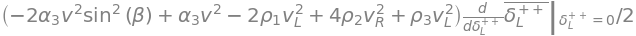

In [319]:
Mpp_square[0,0].simplify()#.args[1].factor()

## Scalar mass spectrum

Following thr hierarchy $v_R >> v_1, k_1$

In [162]:
from sympy import ZeroMatrix

In [163]:
def Mass_matrix_approximation(Mass_matrix): # approximation of the mass matrix only terms proportional to vR
    l = Mass_matrix.shape[0]
    M_approx = ZeroMatrix(l,l).as_explicit().as_mutable()
    for i in range(l):
        for j in range(l):
            factors = Mass_matrix[i, j].expand().collect(vR, evaluate=False)
            for key in factors:
                if key == 1:
                    pass
                else:
                    M_approx[i, j] += factors[key]*key
    return M_approx

In [164]:
MR_square_approx = Mass_matrix_approximation(MR_square)
MR_square_approx

⎡     ⎛                4                            2                         
⎢   2 ⎜     \alpha₃⋅sin (\beta)          \alpha₃⋅sin (\beta)         √2⋅\rho₁⋅
⎢v_R ⋅⎜- ────────────────────────── + ────────────────────────── - ───────────
⎢     ⎜       2                            2                          2    2  
⎢     ⎝  4⋅cos (\beta)⋅cos(2⋅\beta)   4⋅cos (\beta)⋅cos(2⋅\beta)   4⋅v ⋅cos (\
⎢                                                                             
⎢           ⎛              3                                                  
⎢         2 ⎜   \alpha₃⋅sin (\beta)          \alpha₃⋅sin(\beta)        √2⋅\rho
⎢      v_R ⋅⎜───────────────────────── - ───────────────────────── + ─────────
⎢           ⎜4⋅cos(\beta)⋅cos(2⋅\beta)   4⋅cos(\beta)⋅cos(2⋅\beta)      2     
⎢           ⎝                                                        4⋅v ⋅cos(
⎢                                                                             
⎢                                                ⎛  

In [165]:
MR_square_approx.subs(beta,0)

⎡                                                                             
⎢                                                                             
⎢                       0                                                     
⎢                                                                             
⎢                                                                             
⎢                                                                   ⎛         
⎢                                                 β₃⋅v_L⋅v_R      2 ⎜\alpha₃  
⎢                       0                         ────────── + v_R ⋅⎜─────── -
⎢                                                     2             ⎜   4     
⎢                                                                   ⎝         
⎢                                                                             
⎢    ⎛                        2               2⎞                              
⎢    ⎜\alpha₁⋅v   √2⋅\rho₁⋅v_L    √2⋅\rho₃⋅v_L ⎟    

In [166]:
MI_square_approx = Mass_matrix_approximation(MI_square)
MI_square_approx

⎡     ⎛              4                            2                           
⎢   2 ⎜   \alpha₃⋅sin (\beta)          \alpha₃⋅sin (\beta)         √2⋅\rho₁⋅v_
⎢v_R ⋅⎜────────────────────────── - ────────────────────────── + ─────────────
⎢     ⎜     2                            2                          2    2    
⎢     ⎝4⋅cos (\beta)⋅cos(2⋅\beta)   4⋅cos (\beta)⋅cos(2⋅\beta)   4⋅v ⋅cos (\be
⎢                                                                             
⎢           ⎛                3                                                
⎢         2 ⎜     \alpha₃⋅sin (\beta)          \alpha₃⋅sin(\beta)        √2⋅\r
⎢      v_R ⋅⎜- ───────────────────────── + ───────────────────────── - ───────
⎢           ⎜  4⋅cos(\beta)⋅cos(2⋅\beta)   4⋅cos(\beta)⋅cos(2⋅\beta)      2   
⎢           ⎝                                                          4⋅v ⋅co
⎢                                                                             
⎢                                               ⎛   

In [167]:
MI_square_approx.subs(beta, 0)

⎡                                                                             
⎢                                                                             
⎢                        0                                                    
⎢                                                                             
⎢                                                                             
⎢                                                                       ⎛     
⎢                                                     β₃⋅v_L⋅v_R      2 ⎜  \al
⎢                        0                          - ────────── + v_R ⋅⎜- ───
⎢                                                         2             ⎜     
⎢                                                                       ⎝     
⎢                                                                             
⎢    ⎛                          2               2⎞                            
⎢    ⎜  \alpha₁⋅v   √2⋅\rho₁⋅v_L    √2⋅\rho₃⋅v_L ⎟  

In [168]:
Mp_square_approx = Mass_matrix_approximation(Mp_square)
Mp_square_approx

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢     ⎛           2                                      2                    
⎢   2 ⎜  \alpha₃⋅v ⋅sin(\beta)⋅cos(\beta)    √2⋅\rho₁⋅v_L ⋅tan(\beta)    √2⋅\r
⎢v_R ⋅⎜- ──────────────────────────────── + ───────────────────────── - ──────
⎢     ⎜          2    2             2            2    2             2        2
⎢     ⎝     - 8⋅v ⋅cos (\beta) + 4⋅v        - 8⋅v ⋅cos (\beta) + 4⋅v    - 8⋅v 
⎢                                                                             
⎢                                                   

In [170]:
Mp_square_approx.subs(beta,0)

⎡                                                                             
⎢                                                        β₁⋅v_L⋅v_R           
⎢                     0                                  ──────────           
⎢                                                            4                
⎢                                                                             
⎢                 β₁⋅v_L⋅v_R                                                  
⎢                 ──────────                                 0                
⎢                     4                                                       
⎢                                                                             
⎢    ⎛                        2            2⎞                                 
⎢    ⎜√2⋅\alpha₃⋅v   \rho₁⋅v_L    \rho₃⋅v_L ⎟                                 
⎢v_R⋅⎜──────────── - ────────── + ──────────⎟                0                
⎢    ⎝     8            8⋅v          8⋅v    ⎠       

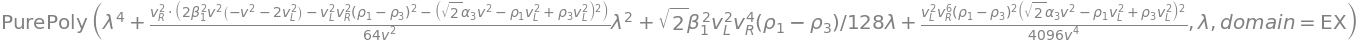

In [171]:
Mp_charpoly = Mp_square_approx.subs(beta,0).charpoly()
Mp_charpoly

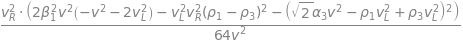

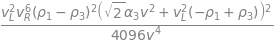

In [172]:
lamb = symbols(r'\lambda')
coeff_Mp_charpoly = Mp_charpoly.all_coeffs()
charpoly = 0

for i in range(len(coeff_Mp_charpoly)):
    coeff_Mp_charpoly[i] = coeff_Mp_charpoly[i].collect([vL, vR, v], lambda x: x.collect(vR, factor))
    display(coeff_Mp_charpoly[i])
    charpoly += coeff_Mp_charpoly[i] * (lamb ** (4-i))



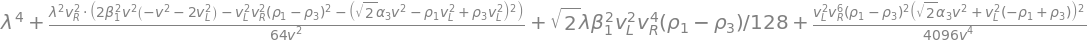

In [173]:
charpoly

In [140]:
Mpp_square_approx = Mass_matrix_approximation(Mpp_square)
Mpp_square_approx

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

## Yukawa charged lepton sector

In [106]:
from sympy import IndexedBase, Idx

In [107]:
#Indexed?

In [108]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [109]:
#ht[i, j]

In [110]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [111]:
nueL, nuL[i]

In [112]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [113]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [114]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [115]:
LY

Charged lepton mass

In [116]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [117]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [118]:
Ml = k*hij
Ml